In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns

import os
import pydicom

%matplotlib inline

In [6]:
train = pd.read_csv('data/train.csv')
print("shape: ", train.shape)
print("different imgae: ", train['image_id'].nunique())
train[200:].head()

shape:  (67914, 8)
different imgae:  15000


image_id          class_name  class_id rad_id  \
200  012969950fbdd28bb50cfa447877cd4e          No finding        14     R1   
201  00aca42a24e4ea6066cca2546150c36e  Aortic enlargement         0     R9   
202  db49c96665f4fe0ff5f4420578e2f185       Calcification         2    R11   
203  cca122e46a24a6ccfeba9ade9f7b933c         Nodule/Mass         8     R8   
204  6f693ffb135213d759427b3e0d26904e          No finding        14     R9   

      x_min   y_min   x_max   y_max  
200     NaN     NaN     NaN     NaN  
201  1526.0   769.0  1826.0  1118.0  
202  1915.0  1177.0  2056.0  1395.0  
203  1577.0  1890.0  1642.0  1956.0  
204     NaN     NaN     NaN     NaN

# Label Including No Finding

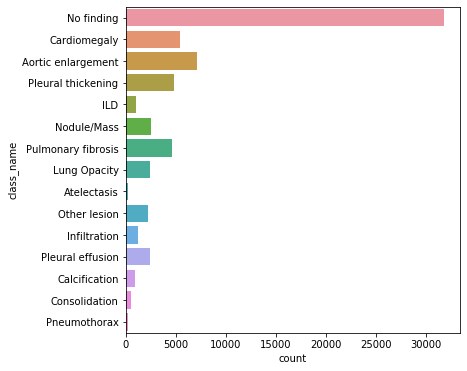

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(y='class_name',data=train)
plt.show()

In [11]:
train.tail()

image_id    class_name  class_id rad_id  x_min  \
67909  936fd5cff1c058d39817a08f58b72cae    No finding        14     R1    NaN   
67910  ca7e72954550eeb610fe22bf0244b7fa    No finding        14     R1    NaN   
67911  aa17d5312a0fb4a2939436abca7f9579    No finding        14     R8    NaN   
67912  4b56bc6d22b192f075f13231419dfcc8  Cardiomegaly         3     R8  771.0   
67913  5e272e3adbdaafb07a7e84a9e62b1a4c    No finding        14    R16    NaN   

       y_min   x_max   y_max  
67909    NaN     NaN     NaN  
67910    NaN     NaN     NaN  
67911    NaN     NaN     NaN  
67912  979.0  1680.0  1311.0  
67913    NaN     NaN     NaN

In [15]:
train.image_id.value_counts()

03e6ecfa6f6fb33dfeac6ca4f9b459c9    57
fa109c087e46fe1ea27e48ce6d154d2f    52
e31be972e181987a8600a8700c1ebe88    48
6d5acf3f8a973a26844d617fffe72998    46
ecf474d5d4f65d7a3e23370a68b8c6a0    46
                                    ..
fe8f22bba9ea2e142143180563964e22     3
e462b73879d647c23796785533e25e1f     3
e51f4e56fc5e970b796959961c10ce26     3
e254b92ab7c0d3f3d332ac04e063c571     3
fd8bd7efba38113c2848079bab15f193     3
Name: image_id, Length: 15000, dtype: int64

# Label excluding No Finding

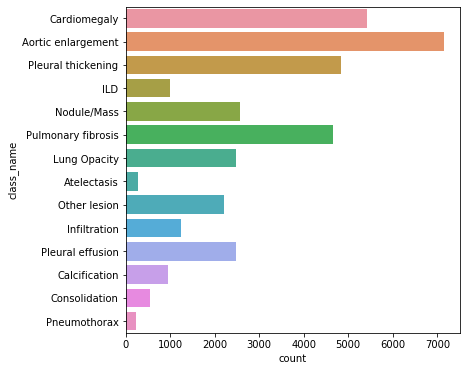

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(y='class_name',data=train[train['class_name'] != 'No finding']);
plt.show()


In [10]:
train[train['class_name'] != 'No finding'].reset_index().tail()

index                          image_id          class_name  class_id  \
36091  67903  b53d1dd80e99ca6bcef9d592f65d3321    Pleural effusion        10   
36092  67906  26d1d5a0ef2e692c6340e74859ffdc53  Pulmonary fibrosis        13   
36093  67907  22672ab82c290c20b86863291e25ef6c                 ILD         5   
36094  67908  db169d0be36123bd55b866d6aa73983b        Other lesion         9   
36095  67912  4b56bc6d22b192f075f13231419dfcc8        Cardiomegaly         3   

      rad_id   x_min   y_min   x_max   y_max  
36091     R9   240.0  1550.0   562.0  2001.0  
36092    R10  1163.0   787.0  1338.0   941.0  
36093     R9   299.0   664.0   794.0  1508.0  
36094     R8     6.0   670.0   272.0  1736.0  
36095     R8   771.0   979.0  1680.0  1311.0

In [14]:
train[train['class_name'] != 'No finding'].image_id.value_counts()

03e6ecfa6f6fb33dfeac6ca4f9b459c9    57
fa109c087e46fe1ea27e48ce6d154d2f    52
e31be972e181987a8600a8700c1ebe88    48
3a302fbbbf3364aa1a7731b59e6b98ec    46
6d5acf3f8a973a26844d617fffe72998    46
                                    ..
6d3cd7503968e1d95d46dccb35e6b617     3
ce99128124dc2e9cb8795a06342c00a2     3
f1a700126451c58e895df07f90c8b1ee     3
aaae825ac199f7a07b03af4622b1746e     3
52fe2f01573413223b1f7edee17de341     3
Name: image_id, Length: 4394, dtype: int64

In [27]:
train[train['class_name'] != 'No finding'].x_max.sort_values()
train[train['class_name'] != 'No finding'].y_max.sort_values()

33099     103.0
42563     122.0
65397     127.0
55466     134.0
43014     137.0
          ...  
12556    3282.0
28355    3282.0
8178     3311.0
43866    3353.0
24127    3384.0
Name: y_max, Length: 36096, dtype: float64

# Different Rad

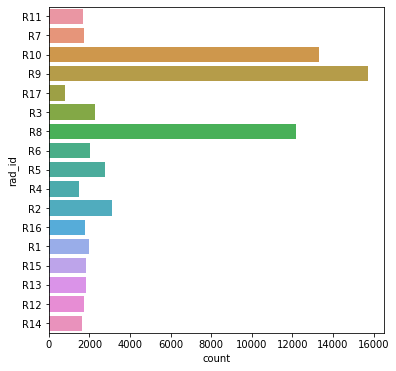

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(y='rad_id',data=train)
plt.show()

# Heatmap

In [77]:

def fill_heatmap(hm,x_min,y_min, x_max, y_max):
    hm[int(y_min):int(y_max),int(x_min):int(x_max)] += 1
hm = []
class_name = []
for i,name in enumerate(train[train['class_name'] != 'No finding']['class_name'].unique()):
    hm.append(np.zeros((3200,3400)))
    class_name.append(name)
    count = 0
    for item in train[train['class_name'] == name].iterrows():
        count += 1
        fill_heatmap(hm[i], item[1]['x_min'],item[1]['y_min'],item[1]['x_max'],item[1]['y_max'])



In [78]:
fig,ax = plt.subplots(7,2, figsize=(12,25))
fig.suptitle('Heatmap of bounding box for different categories',fontsize=25)
for i, item in enumerate(hm):
    ax[int(i/2)][i%2].set_title(class_name[i])
    sns.heatmap(hm[i], ax = ax[int(i/2)][i%2],xticklabels = False, yticklabels= False,cbar = False)
plt.show()

In [13]:
train[train['image_id'] == '000d68e42b71d3eac10ccc077aba07c1']

image_id          class_name  class_id rad_id  \
4702   000d68e42b71d3eac10ccc077aba07c1        Other lesion         9     R8   
5174   000d68e42b71d3eac10ccc077aba07c1        Other lesion         9    R10   
23835  000d68e42b71d3eac10ccc077aba07c1        Other lesion         9     R9   
25397  000d68e42b71d3eac10ccc077aba07c1        Other lesion         9     R9   
30608  000d68e42b71d3eac10ccc077aba07c1  Pleural thickening        11     R9   
31973  000d68e42b71d3eac10ccc077aba07c1  Pulmonary fibrosis        13     R9   
33219  000d68e42b71d3eac10ccc077aba07c1  Pleural thickening        11     R9   
41457  000d68e42b71d3eac10ccc077aba07c1  Aortic enlargement         0     R9   
43884  000d68e42b71d3eac10ccc077aba07c1        Other lesion         9     R8   
49118  000d68e42b71d3eac10ccc077aba07c1        Other lesion         9     R8   
49978  000d68e42b71d3eac10ccc077aba07c1        Lung Opacity         7    R10   
51345  000d68e42b71d3eac10ccc077aba07c1        Other lesion         9     R9   
54755  000d68e42b71d3eac10ccc077aba07c1        Other lesion         9     R9   
59420  000d68e42b71d3eac10ccc077aba07c1        Other lesion         9    R10   
62215  000d68e42b71d3eac10ccc077aba07c1        Lung Opacity         7     R9   
65129  000d68e42b71d3eac10ccc077aba07c1        Other lesion         9     R8   

        x_min   y_min   x_max   y_max  
4702     43.0     0.0   882.0  1435.0  
5174   2108.0  1172.0  2284.0  1834.0  
23835  2076.0  1171.0  2252.0  1800.0  
25397   345.0    18.0   728.0   316.0  
30608   469.0   303.0   781.0   369.0  
31973  1355.0   616.0  1700.0  1177.0  
33219  1184.0   246.0  1586.0   327.0  
41457  1068.0   517.0  1350.0   768.0  
43884  2093.0  1200.0  2123.0  1244.0  
49118  1182.0     1.0  2100.0  1484.0  
49978   170.0   478.0  2034.0  1482.0  
51345    10.0  1449.0    68.0  1687.0  
54755  1285.0     0.0  1730.0   244.0  
59420   329.0     0.0  1777.0   291.0  
62215  1184.0   246.0  1586.0   327.0  
65129    72.0  2076.0   162.0  2431.0